***Demo Prepared by Prof Monali Mavani***


This notebook explores how different values of the **Ridge regularization parameter (λ)** affect:
- Model coefficients
- Prediction accuracy (RMSE)
- Model Complexity
 **California Housing dataset** is used for demonstration

 L2 penalty discourages large weights by penalizing their squared magnitudes.

Ridge regression prefers smaller but non-zero weights.


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load data
data1 = fetch_california_housing()
X = data1.data  # all features
y = data1.target
feature_names = data1.feature_names
print(feature_names)


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# Range of lambda values
lambdas = np.logspace(-3, 5, 50)
ridge_coefs = []
rmse_vals = []


In [ ]:

# Store coefficients and RMSEs for each lambda
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    y_pred = ridge.predict(X_test)
    rmse_vals.append(np.sqrt(mean_squared_error(y_test, y_pred)))

ridge_coefs = np.array(ridge_coefs)


In [ ]:
# Convert coefficients to DataFrame
ridge_df = pd.DataFrame(ridge_coefs, columns=feature_names)
ridge_df.insert(0, "Lambda", lambdas)  # Add lambda column at the front

# Optionally view the first few rows of coefficients
print(ridge_df.shape)
print(ridge_df.head())


(50, 9)
     Lambda    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  0.001000  0.448675  0.009724 -0.123323   0.783143   -0.000002 -0.003526   
1  0.001456  0.448675  0.009724 -0.123323   0.783142   -0.000002 -0.003526   
2  0.002121  0.448675  0.009724 -0.123323   0.783141   -0.000002 -0.003526   
3  0.003089  0.448674  0.009724 -0.123322   0.783140   -0.000002 -0.003526   
4  0.004498  0.448674  0.009724 -0.123322   0.783137   -0.000002 -0.003526   

   Latitude  Longitude  
0 -0.419792  -0.433708  
1 -0.419792  -0.433708  
2 -0.419792  -0.433708  
3 -0.419792  -0.433708  
4 -0.419792  -0.433708  


# **Ridge: Coefficient Shrinkage vs Lambda**

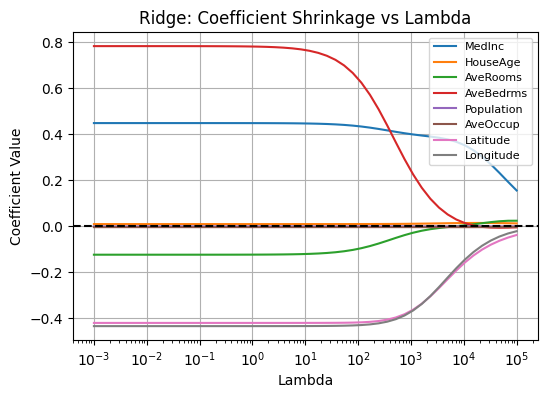

In [ ]:

plt.figure(figsize=(6, 4))
for i in range(X.shape[1]):
    plt.plot(lambdas, ridge_coefs[:, i], label=feature_names[i])
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coefficient Value")
plt.title("Ridge: Coefficient Shrinkage vs Lambda")
plt.axhline(0, color="black", linestyle="--")
plt.legend(loc="best", fontsize=8)
plt.grid(True)
plt.show()


# **Prediction vs lambda**

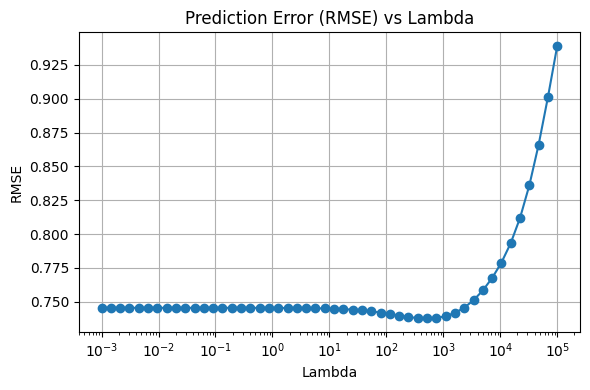

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(lambdas, rmse_vals, marker='o')
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("Prediction Error (RMSE) vs Lambda")
plt.grid(True)
plt.show()


# **Model Complexity vs lambda**

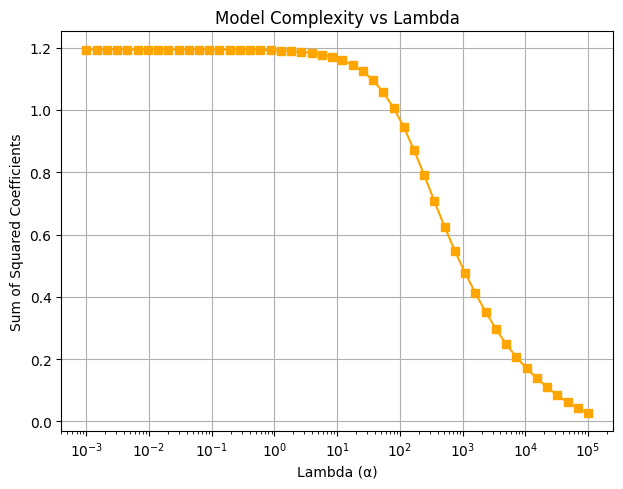

In [ ]:
# Compute L2 norm of coefficients
coef_norm = np.sum(ridge_coefs**2, axis=1)

plt.figure(figsize=(12, 5))


# Coefficient norm vs Lambda
plt.subplot(1, 2, 2)
plt.plot(lambdas, coef_norm, marker='s', color='orange')
plt.xscale('log')
plt.xlabel('Lambda (α)')
plt.ylabel('Sum of Squared Coefficients')
plt.title('Model Complexity vs Lambda')
plt.grid(True)

plt.tight_layout()
plt.show()
